<a href="https://colab.research.google.com/github/PhaniChandraSekhar/AIML_Practice/blob/main/t_Distributed_Stochastic_Neighbour_Embedding_(t_SNE)_decomposition_of_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
#%matplotlib inline

In [2]:
data = datasets.fetch_openml(
'mnist_784',
version=1,
return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

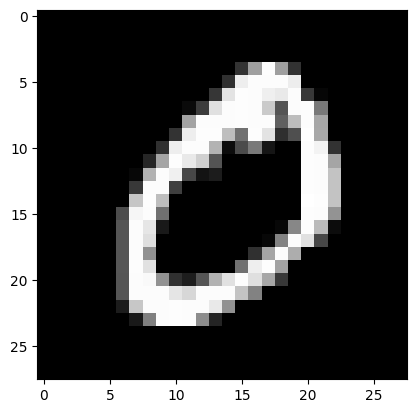

In [4]:
# Convert the pixel_values DataFrame to a NumPy array
pixel_values = pixel_values.to_numpy()

single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [5]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [6]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

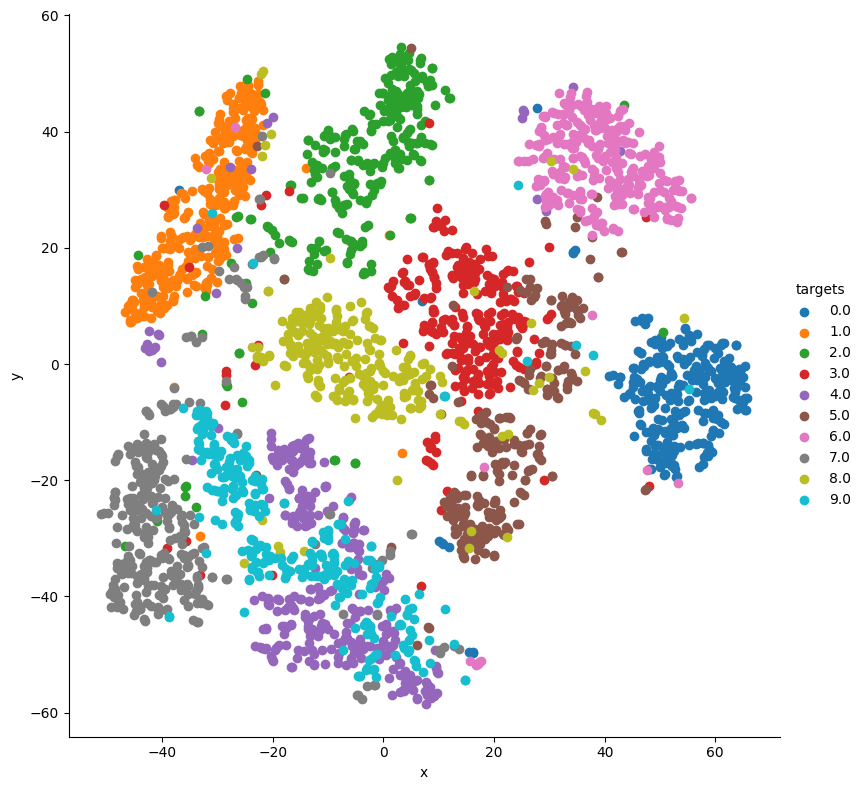

In [8]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()